In [46]:
import matplotlib.pyplot as plt

# Set this variable to True to run an interactive simulator. This will not work on CoCalc.
interactive = False  
#comment out 'matplotlib inline' if using the GUI
%matplotlib inline 

if interactive:
    matplotlib.use('TkAgg')
import pylab
import numpy as np


class Voter:
    
    def __init__(self, interactive):
        self.interactive = interactive
        self.g = nx.karate_club_graph()
        self.g.pos = nx.spring_layout(self.g)
        for i in self.g.nodes:
            self.g.nodes[i]['state'] = 1 if np.random.uniform() < .5 else 0
        
    def initialize(self):
        self.g = nx.karate_club_graph()
        self.g.pos = nx.spring_layout(self.g)
        for i in self.g.nodes:
            self.g.nodes[i]['state'] = 1 if np.random.uniform() < .5 else 0

    def observe(self):
        
        if self.interactive:
            pylab.cla()  # Clear the current figure
        else:
            pylab.figure()  # Create a new figure

        nx.draw(self.g, vmin = 0, vmax = 1,
                node_color = [self.g.nodes[i]['state'] for i in self.g.nodes],
                cmap="Set3",
                pos = self.g.pos,
                labels = nx.get_node_attributes(self.g, 'state'))
        
        if not self.interactive:
            pylab.show()

    def update(self):
        listener = rd.choice(list(self.g.nodes))
        speaker = rd.choice(list(self.g.neighbors(listener)))
        self.g.nodes[listener]['state'] = self.g.nodes[speaker]['state']


Initial state:


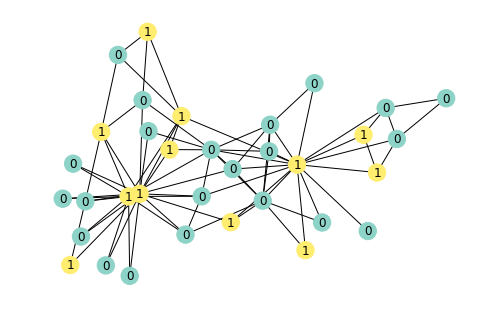

Next 5 states:


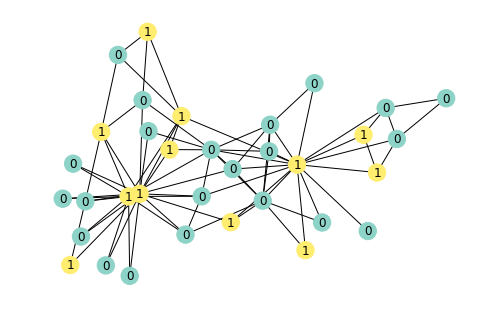

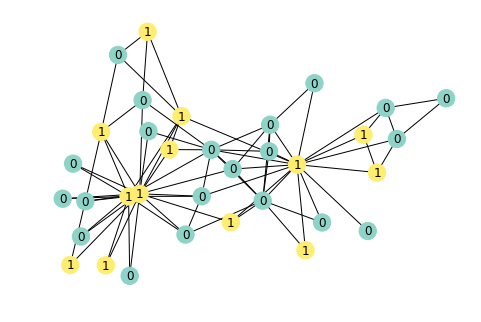

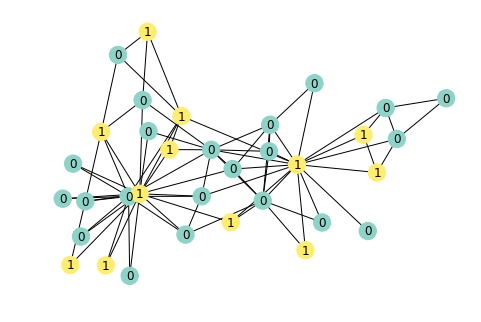

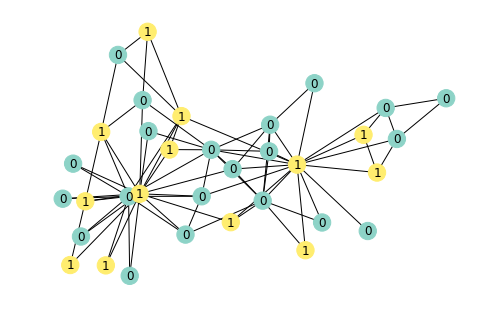

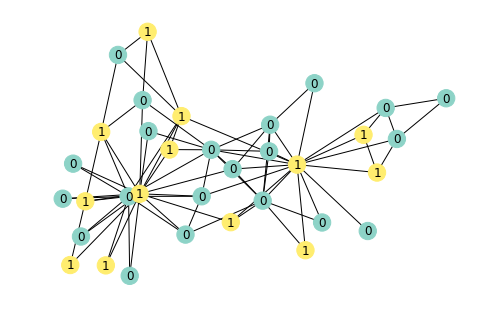


After 100 steps:


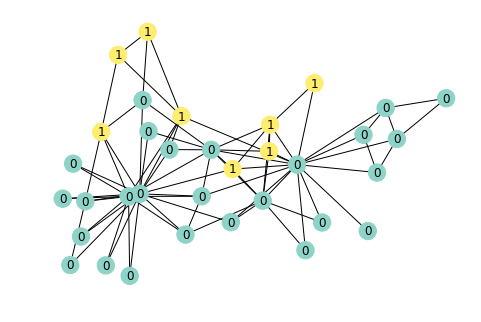

In [47]:

sim = Voter(interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    pycxsimulator.GUI().start(func=[sim.initialize, sim.observe, sim.update])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.observe()

    print('Next 5 states:')
    for i in range(5):
        sim.update()
        sim.observe()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.update()
    sim.observe()